## Grow nose poke EDA

*Goal*: to see how long (in sessions) it takes Akrami Rats to grow to about 1.5s of nose poking and what the violation rate at that point is.

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys

[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]
from get_rat_data import *

sns.set_context("talk")

In [44]:
df = get_rat_viol_data().query("training_stage == 1 and session < 50")

returning viol dataset for all animals


In [63]:
# todo- this should be an agg function
session_max_del = df.groupby(["animal_id", "session"]).delay.max().reset_index()
session_viol_rate = df.groupby(["animal_id", "session"]).violation.mean().reset_index()

merged_df = pd.merge(session_max_del, session_viol_rate, on=["animal_id", "session"])

In [46]:
sess_to_gnp_thresh = (
    session_max_del.query("delay < 1.5").groupby("animal_id").session.max() + 1
).reset_index()

In [47]:
sess_to_gnp_thresh.session.describe()

count    19.000000
mean     13.631579
std       7.470018
min       5.000000
25%       7.000000
50%      13.000000
75%      18.500000
max      31.000000
Name: session, dtype: float64

okay so it definitely seems like it takes longer to reach 1.5 seconds (on average 13 days)! lets do some prelim EDA

Text(0.5, 1.0, 'Number of Sessions to 1.5s Fixation')

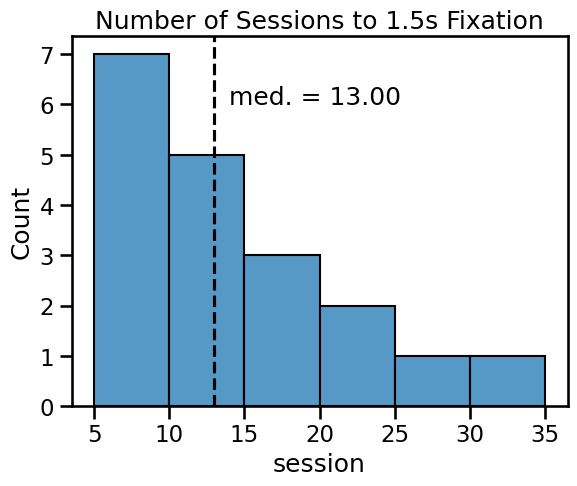

In [109]:
sns.histplot(data=sess_to_gnp_thresh, x="session", binwidth=5)

median = sess_to_gnp_thresh.session.median()
plt.axvline(median, color="k", linestyle="--")
plt.text(x=14, y=6, s=f"med. = {median:.2f}")
plt.title("Number of Sessions to 1.5s Fixation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


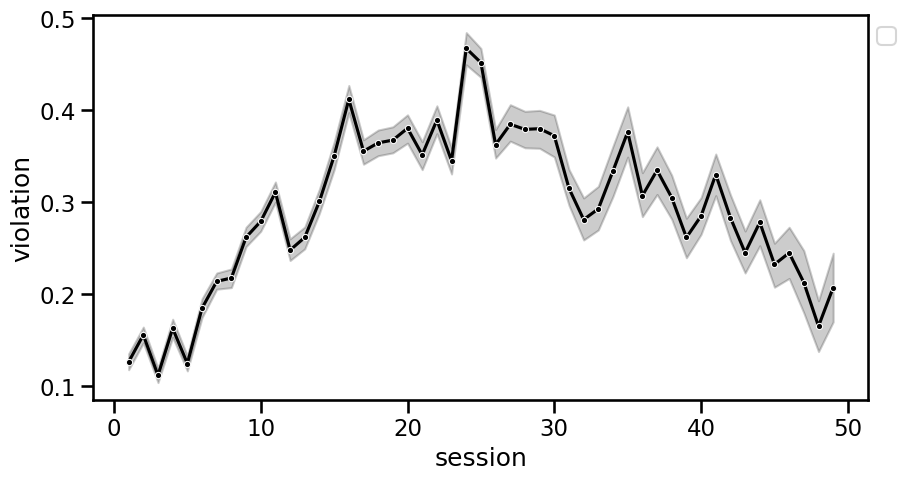

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x="session", y="violation", ax=ax, marker=".", color="black")

ax.legend(bbox_to_anchor=(1.05, 1))

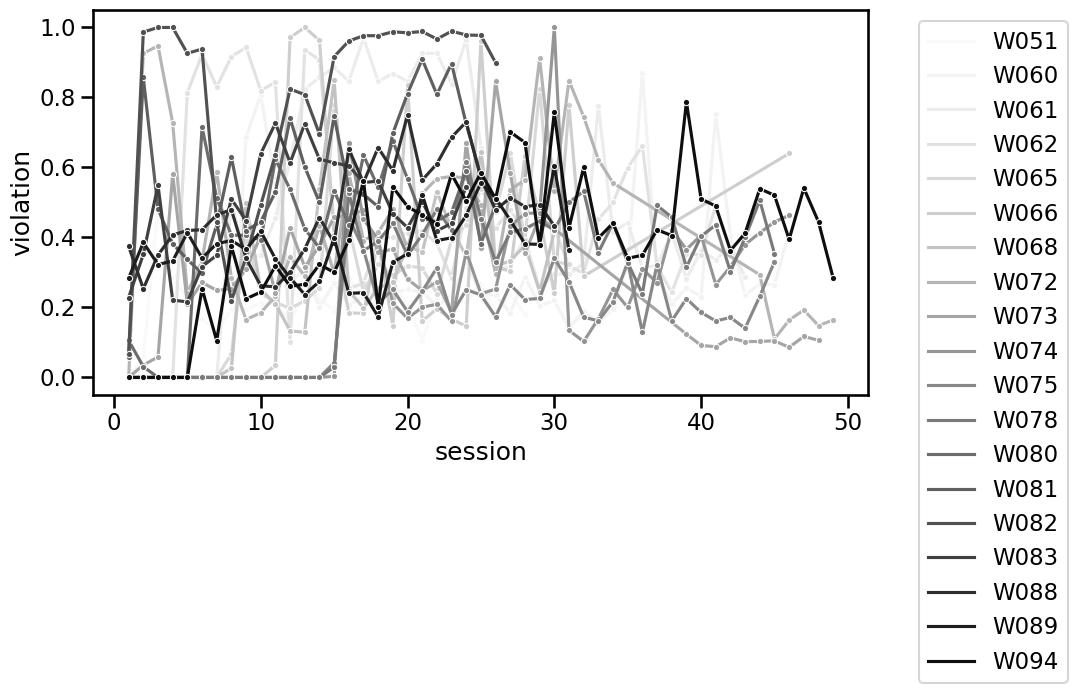

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=df,
    x="session",
    y="violation",
    hue="animal_id",
    err_style=None,
    ax=ax,
    marker=".",
    palette="Greys",
)

ax.legend(bbox_to_anchor=(1.05, 1))

violation rates seem to be rise and then fall over sessions but at times can be as high as 40% (which is similar to the multi cpoke rate).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


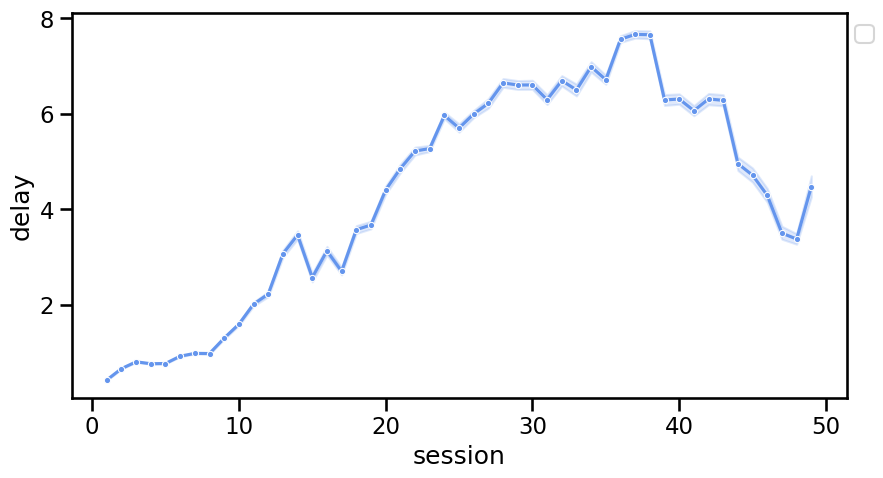

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=df,
    x="session",
    y="delay",
    ax=ax,
    marker=".",
    color="cornflowerblue",
)

ax.legend(bbox_to_anchor=(1.05, 1))

[(0.0, 2.0)]

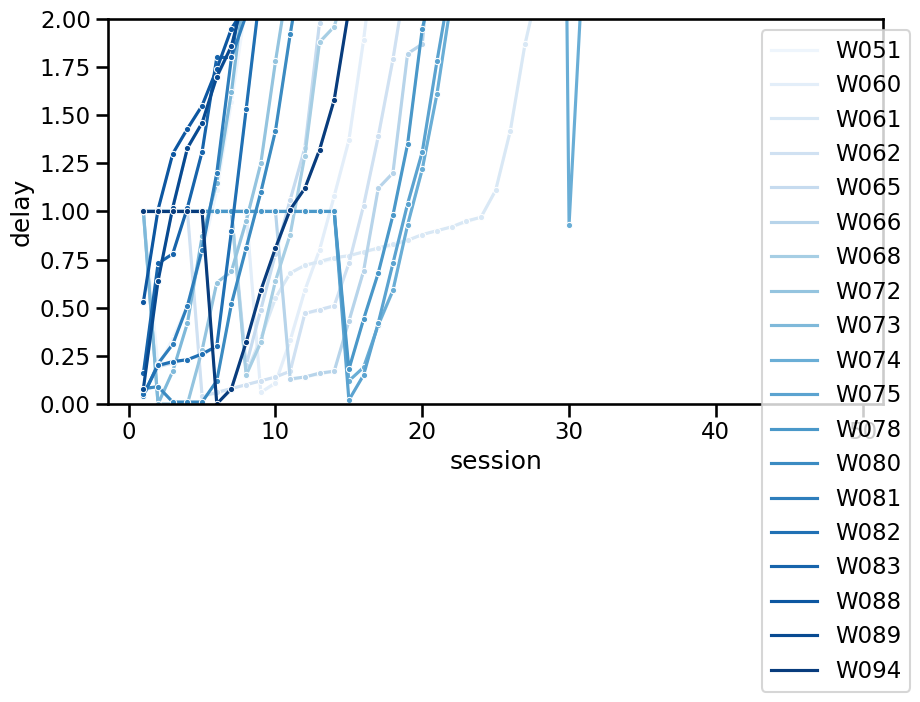

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=df,
    x="session",
    y="delay",
    hue="animal_id",
    estimator="max",
    ax=ax,
    marker=".",
    palette="Blues",
)

ax.legend(bbox_to_anchor=(1.05, 1))
ax.set(ylim=(0, 2.0))

Animals can vary quite a lot in their delay lerning trajectories, but all seem to get it after two weeks or so

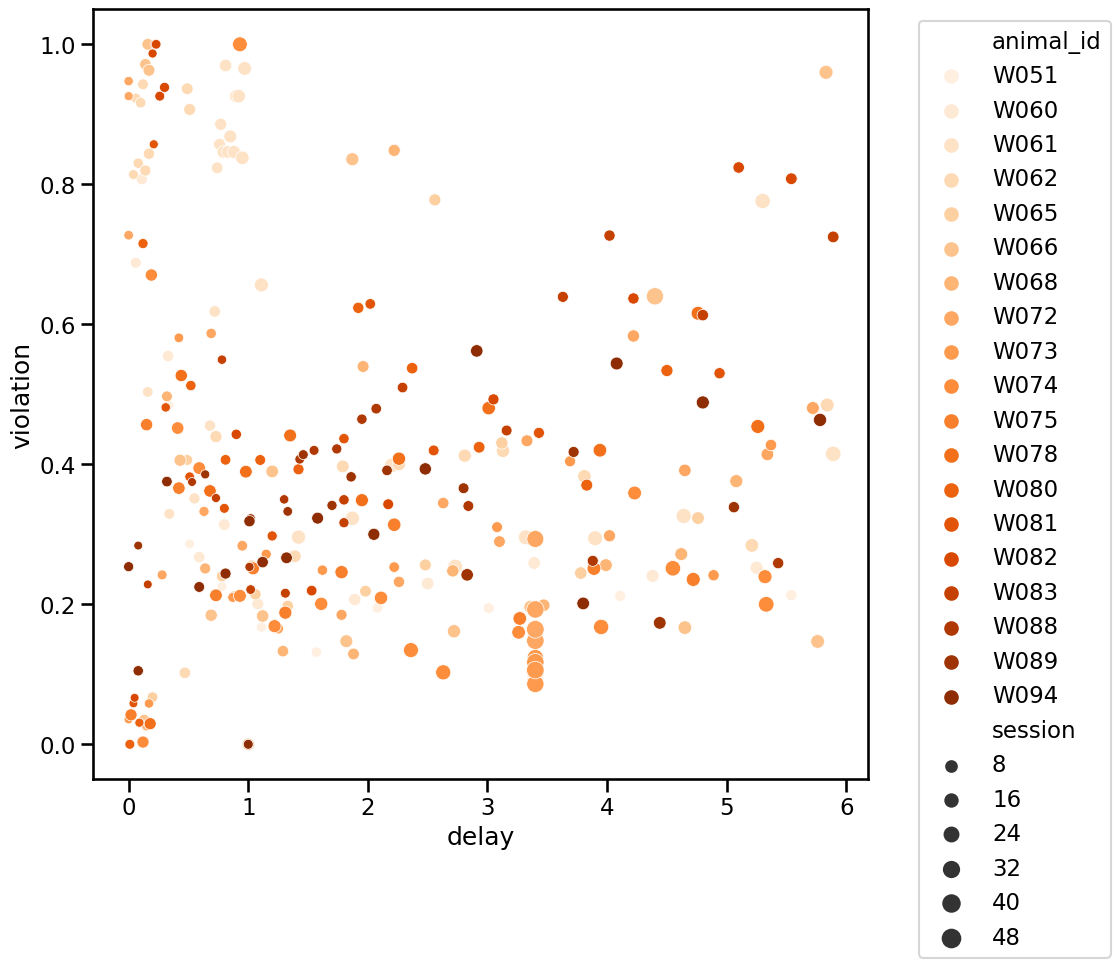

In [75]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    data=merged_df.query("delay < 6"),
    x="delay",
    y="violation",
    hue="animal_id",
    palette="Oranges",
    size="session",
)

ax.legend(bbox_to_anchor=(1.05, 1))

Not a super clear pattern here tbh.


Next steps: looking at violation rate before and after 1.5 s cut off to get a window around that time of avg viol rate. 

maybe drop the sessions when delay is 1.0? I'm worried these are not actually cpoke stages? This could be done in the new dataset